### Exploratory Data Analysis of FSIS data

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
FSIS_DATA = "../data/fsis-processors-with-location.csv"

In [4]:
df = pd.read_csv(FSIS_DATA)
df.head()

,Unnamed: 0,EstNumber,EstID,Parent Corporation,Establishment Name,State,Size,Animals Processed,Processed\nVolume\nCategory,Slaughter\nVolume\nCategory,Full Address,latitude,longitude
0,0,M267,4802,JBS,JBS Tolleson Inc.,AZ,Large,Beef,5.0,4.0,"651 S. 91st Ave, Tolleson, AZ 85353",33.441660,-112.252559
1,1,M354,5117,Cargill,Cargill Meat Solutions,CA,Large,Beef,5.0,4.0,"3115 S. Fig Ave., Fresno, CA 93706",36.689651,-119.801950
2,2,M6063A,5289,Central Valley Meat Company,"Central Valley Meat Co., Inc.",CA,Large,Beef,5.0,4.0,"10431 8 3/4 Ave., Hanford, CA 93230",36.321273,-119.612222
3,3,M783 + P783 + V783,5144,Central Valley Meat Company,Harris Ranch Beef Company,CA,Large,Beef,5.0,4.0,"16277 S McCall Ave., Selma, CA 93662",36.499212,-119.614553
4,4,M21488 + V21488,8349,Independent,OWB Packers LLC,CA,Large,Beef,4.0,4.0,"57 East Shank Road, Brawley, CA 92227",33.000969,-115.521786


### Distribution of Plants

In [5]:
df["Animals Processed"].value_counts()

Animals Processed
Beef,Pork,Sheep/Lamb                   420
Chicken                                184
Beef                                   141
Pork                                   107
Beef,Pork                               92
Beef,Sheep/Lamb                         66
Turkey                                  39
Chicken,Turkey                          29
Turkey,Chicken                          21
Sheep/Lamb                              17
Beef,Pork,Chicken,Turkey,Sheep/Lamb     11
Beef,Pork,Sheep/Lamb,Chicken,Turkey      5
Sheep/Lamb,Pork                          5
Beef,Pork,Chicken,Turkey                 3
Pork,Sheep/Lamb                          3
Beef,Pork,Sheep/Lamb,Chicken             2
Beef,Chicken,Turkey                      1
Pork,Turkey                              1
Sheep/Lamb,Pork,Chicken,Turkey           1
Beef,Sheep/Lamb,Chicken,Turkey           1
Name: count, dtype: int64

In [6]:
animals = ["Beef", "Pork", "Sheep/Lamb", "Chicken", "Turkey"]
distrib = {}

for animal in animals:
    df[animal] = df['Animals Processed'].str.contains(animal).astype(int)
    distrib[animal] = sum(df[animal])

In [7]:
print(distrib)

{'Beef': 742, 'Pork': 650, 'Sheep/Lamb': 531, 'Chicken': 258, 'Turkey': 112}


In [8]:
df.head()

,Unnamed: 0,EstNumber,EstID,Parent Corporation,Establishment Name,State,Size,Animals Processed,Processed\nVolume\nCategory,Slaughter\nVolume\nCategory,Full Address,latitude,longitude,Beef,Pork,Sheep/Lamb,Chicken,Turkey
0,0,M267,4802,JBS,JBS Tolleson Inc.,AZ,Large,Beef,5.0,4.0,"651 S. 91st Ave, Tolleson, AZ 85353",33.441660,-112.252559,1,0,0,0,0
1,1,M354,5117,Cargill,Cargill Meat Solutions,CA,Large,Beef,5.0,4.0,"3115 S. Fig Ave., Fresno, CA 93706",36.689651,-119.801950,1,0,0,0,0
2,2,M6063A,5289,Central Valley Meat Company,"Central Valley Meat Co., Inc.",CA,Large,Beef,5.0,4.0,"10431 8 3/4 Ave., Hanford, CA 93230",36.321273,-119.612222,1,0,0,0,0
3,3,M783 + P783 + V783,5144,Central Valley Meat Company,Harris Ranch Beef Company,CA,Large,Beef,5.0,4.0,"16277 S McCall Ave., Selma, CA 93662",36.499212,-119.614553,1,0,0,0,0
4,4,M21488 + V21488,8349,Independent,OWB Packers LLC,CA,Large,Beef,4.0,4.0,"57 East Shank Road, Brawley, CA 92227",33.000969,-115.521786,1,0,0,0,0


### Distribution of Sizes

In [9]:
df["Size"].value_counts()

Size
Very Small    630
Small         289
Large         230
Name: count, dtype: int64

In [10]:
df.groupby(["Animals Processed", "Size"]).size()

Animals Processed                    Size      
Beef                                 Large          40
                                     Small          52
                                     Very Small     49
Beef,Chicken,Turkey                  Large           1
Beef,Pork                            Small          13
                                     Very Small     79
Beef,Pork,Chicken,Turkey             Small           2
                                     Very Small      1
Beef,Pork,Chicken,Turkey,Sheep/Lamb  Small           1
                                     Very Small     10
Beef,Pork,Sheep/Lamb                 Small          72
                                     Very Small    348
Beef,Pork,Sheep/Lamb,Chicken         Very Small      2
Beef,Pork,Sheep/Lamb,Chicken,Turkey  Very Small      5
Beef,Sheep/Lamb                      Small          16
                                     Very Small     50
Beef,Sheep/Lamb,Chicken,Turkey       Very Small      1
Chicken          

### Distribution of locations by states

In [11]:
df.pivot_table(values=animals, index="State", aggfunc="sum")

,Beef,Chicken,Pork,Sheep/Lamb,Turkey
State,,,,,
AK,3,0,3,3,0
AL,7,19,7,6,1
AR,7,21,5,5,5
AZ,5,0,2,2,0
CA,29,12,17,17,7
CO,25,1,19,19,0
CT,5,0,3,4,0
DE,1,5,1,1,0
FL,19,2,13,13,1


### Additional questions and analysis

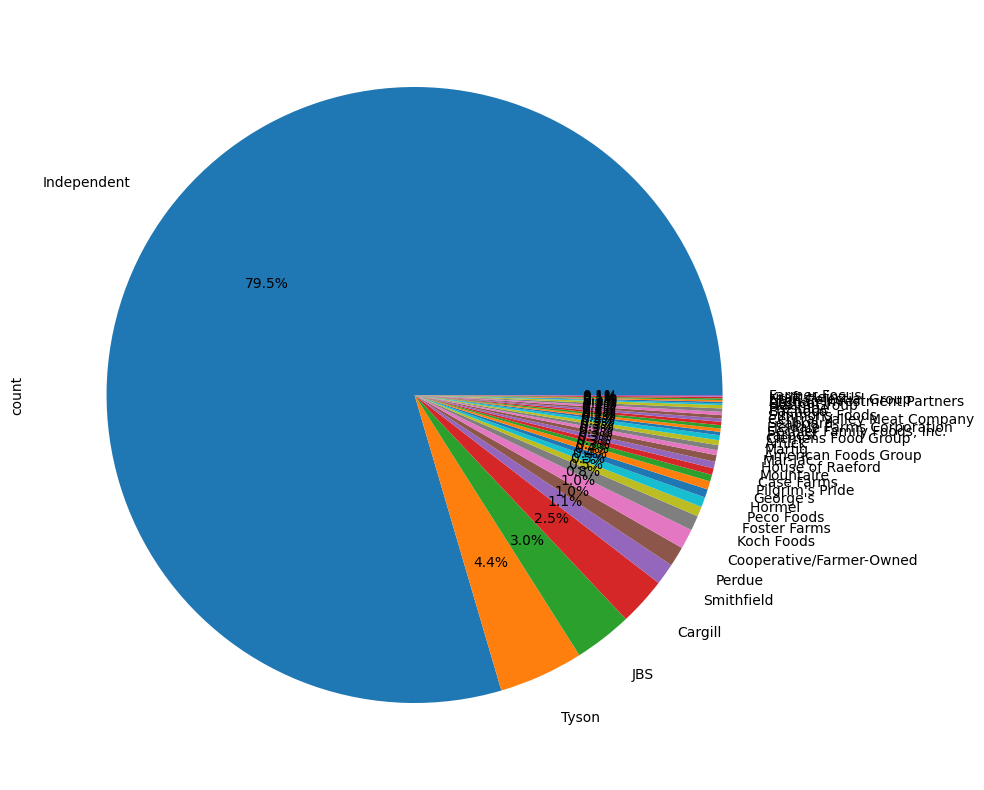

In [44]:
# Market share of parent corporations

plt.figure(figsize=(10, 10))

df["Parent Corporation"].value_counts().plot(kind='pie', labeldistance=1.15, autopct='%1.1f%%')
plt.show()

In [46]:
df.pivot_table(values=animals, index="Parent Corporation", aggfunc="sum")

,Beef,Chicken,Pork,Sheep/Lamb,Turkey
Parent Corporation,,,,,
American Foods Group,3,0,0,0,0
Amick,0,3,0,0,0
Aterian Investment Partners,0,1,0,0,0
Bachoco,0,2,0,0,0
Cargill,6,20,0,0,3
Case Farms,0,4,0,0,0
Central Valley Meat Company,2,0,0,0,0
Clemens Food Group,0,0,2,0,0
Cooperative/Farmer-Owned,5,0,8,5,3
